In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [69]:
df = pd.read_csv('/Users/timo.wacke/Downloads/infilled_20221109_20240115_2.dat', sep=' ')
df

,year,mon,day,hour,min,int,bmp2_temp,bmp2_pres,bmp2_slp,bmp2_alt,...,sth_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,filled_mcp9808,combined_mcp9808
0,2022,11,9,8,0,-999.99,-999.99,-999.99,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,19.46,19.46
1,2022,11,9,9,0,-999.99,-999.99,-999.99,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,19.74,19.74
2,2022,11,9,10,0,-999.99,-999.99,-999.99,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,19.89,19.89
3,2022,11,9,11,0,-999.99,-999.99,-999.99,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,20.00,20.00
4,2022,11,9,12,0,-999.99,-999.99,-999.99,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,19.91,19.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,2024,1,15,4,0,-999.99,9.40,1015.90,1021.69,-999.99,...,-999.99,9.10,-999.99,261.00,255.00,-999.99,-999.99,0.80,-999.99,9.10
10365,2024,1,15,5,0,-999.99,9.80,1016.30,1022.10,-999.99,...,-999.99,9.50,-999.99,286.00,541.00,-999.99,-999.99,-999.99,-999.99,9.50
10366,2024,1,15,6,0,-999.99,10.20,1017.10,1022.90,-999.99,...,-999.99,9.90,-999.99,281.00,458.50,-999.99,344.00,1.30,-999.99,9.90
10367,2024,1,15,7,0,-999.99,10.40,1017.90,1023.71,-999.99,...,-999.99,10.10,-999.99,288.00,508.00,-999.99,-999.99,-999.99,-999.99,10.10


In [70]:

# make index from min hour day mon year columns
df["datetime"] = df.apply(lambda row: datetime(int(row["year"]), int(row["mon"]), int(row["day"]), int(row["hour"]), int(row["min"])), axis = 1)
df.set_index('datetime', inplace=True)

# where any values in columns mcp9808 or filled_mcp9808 are below 100, set to NaN
#for col in ['mcp9808', 'filled_mcp9808']:
   # df[col] = df[col].apply(lambda x: x if x > -100 else None)


In [71]:
def plot_n_timesteps_of_data(_df, n=None):

    if n is None:
        n = len(_df)
        
    import random
    start_idx = random.randint(0, len(_df) - n)
    end_idx = start_idx + n
    
    _df = _df.iloc[start_idx:end_idx]

    plt.figure(figsize=(10, 6))

    # plot the columns "mcp9808" and "filled_mcp9808"
    plt.plot(_df.index, _df['mcp9808'], label='mcp9808')
    plt.plot(_df.index, _df['filled_mcp9808'], label='filled_mcp9808')

    # add a legend
    plt.legend()

    # rotate the x-axis labels
    plt.xticks(rotation=45)

    # add a title
    plt.title('mcp9808 vs filled_mcp9808')

    # add a y-axis label
    plt.ylabel('Temperature (°C)')
    plt.show()
    


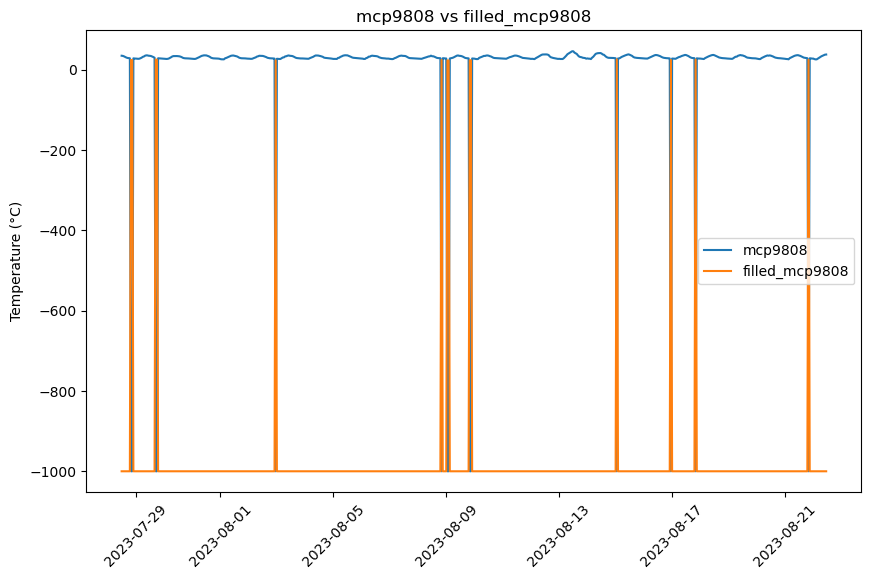

In [91]:
plot_n_timesteps_of_data(df, n=600)